In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('filtered_evt.csv')

In [2]:
df.head(5)

,the_geom,cartodb_id,the_geom_webmercator,id,bbl,bin,address,zipcode,bldgtype,idflags,ess,year,gfa,gfaflags,numbldgs,numfloors,energy,eui,euiflags,wui,wuiflags,ghg,ghgflags,bep_score,bldg_class,group_threshold,ghgi_25_target,ghgi_30_target,value,primary_type_size_rate,primary_type,other_types_dict,has_datacenter,electricity,bedrooms,natural_gas,steam,worker_dens,res_units,diesel,fuel_4,fuel_2,fuel_5_6,gfa_cat,age_cat,value_cat,eui_base,eui_diff,wui_base,wui_diff,ghg_base,ghg_diff,fuel_mix
0,NaN,104,NaN,7386333,1.007590e+09,1090378,338 W 36th St,10018,Hotel,0,83.0,1980,197027.0,0,1.0,26.0,25987464.7,131.9,0,63.96,0,4.49,0,NaN,NaN,NaN,NaN,NaN,42600425.0,1.0,Hotel,NaN,0,7751154.3,NaN,4319418.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,4.0,176.5,-0.252691,80.72,-0.207631,5.56,-0.192446,"{'Fuel Oil 4': nan, 'Fuel Oil 2': nan, 'Natura..."
1,NaN,175,NaN,6791730,4.150090e+09,4296629,15606 Rockaway Blvd,11434,Hotel,0,38.0,2001,42550.0,0,1.0,4.0,9098212.8,213.8,0,41.91,0,7.08,0,NaN,NaN,NaN,NaN,NaN,6983550.0,1.0,Hotel,NaN,0,2773454.5,NaN,1259900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1.0,176.8,0.209276,36.48,0.148849,5.88,0.204082,"{'Fuel Oil 4': nan, 'Fuel Oil 2': nan, 'Natura..."
2,NaN,207,NaN,14441087,2.058031e+09,2084227,4415 Post Road,10471,Residence Hall/Dormitory,0,68.0,1974,27800.0,0,1.0,5.0,3623522.9,130.3,0,34.01,0,5.21,0,NaN,NaN,NaN,NaN,NaN,3888450.0,1.0,Residence Hall/Dormitory,NaN,0,653957.5,NaN,1683100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.0,133.1,-0.021037,31.52,0.078997,5.42,-0.038745,"{'Fuel Oil 4': nan, 'Fuel Oil 2': nan, 'Natura..."
3,NaN,378,NaN,6814275,2.047320e+09,2060475,1215 E. GUN HILL RD,10469,Bowling Alley,0,NaN,1950,36263.0,0,1.0,2.0,3784253.8,104.4,0,7.21,0,3.57,0,NaN,NaN,NaN,NaN,NaN,1687050.0,NaN,NaN,NaN,0,1092505.4,NaN,697400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,0.0,142.1,-0.265306,11.01,-0.345141,4.88,-0.268443,"{'Fuel Oil 4': nan, 'Fuel Oil 2': nan, 'Natura..."
4,NaN,603,NaN,6316150,1.002710e+09,1079602,152 Henry Street,10002,Worship Facility,0,51.0,1993,37565.0,0,1.0,8.0,2227841.3,59.3,0,1.14,0,2.17,0,NaN,NaN,NaN,NaN,NaN,3074400.0,1.0,Worship Facility,NaN,0,509901.7,NaN,723893.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,1.0,67.9,-0.126657,10.49,-0.891325,2.63,-0.174905,"{'Fuel Oil 4': nan, 'Fuel Oil 2': nan, 'Natura..."


In [3]:
# INITIAL DATA EXPLORATION
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21132 entries, 0 to 21131
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   the_geom                0 non-null      float64
 1   cartodb_id              21132 non-null  int64  
 2   the_geom_webmercator    0 non-null      float64
 3   id                      21132 non-null  int64  
 4   bbl                     21131 non-null  float64
 5   bin                     21116 non-null  object 
 6   address                 21132 non-null  object 
 7   zipcode                 21132 non-null  object 
 8   bldgtype                21132 non-null  object 
 9   idflags                 21132 non-null  int64  
 10  ess                     18276 non-null  float64
 11  year                    21132 non-null  int64  
 12  gfa                     21132 non-null  float64
 13  gfaflags                21132 non-null  int64  
 14  numbldgs                20854 non-null

In [4]:
# Check missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
print("\nMissing values percentage:")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


Missing values percentage:
the_geom                  100.000000
the_geom_webmercator      100.000000
res_units                 100.000000
bep_score                 100.000000
fuel_5_6                   99.962143
diesel                     99.933750
steam                      96.465077
fuel_4                     94.974446
worker_dens                88.647549
fuel_2                     84.639409
other_types_dict           76.225629
wui_diff                   31.601363
bedrooms                   28.000189
wui                        26.041075
bldg_class                 25.979557
group_threshold            25.974825
ghgi_30_target             25.974825
ghgi_25_target             25.974825
wui_base                   15.100322
ess                        13.515048
natural_gas                 4.363051
eui_diff                    3.520727
ghg_diff                    3.501798
eui_base                    3.378762
ghg_base                    3.004921
primary_type_size_rate      2.385009
primary_ty

In [5]:
# DATA CLEANING
print("\n--- Data Cleaning ---")
# Remove columns with high percentage of missing values (>50%)
high_missing_cols = missing_percentage[missing_percentage > 50].index.tolist()
print(f"Removing {len(high_missing_cols)} columns with >50% missing values: {high_missing_cols}")
df = df.drop(columns=high_missing_cols)


--- Data Cleaning ---
Removing 11 columns with >50% missing values: ['the_geom', 'the_geom_webmercator', 'bep_score', 'other_types_dict', 'steam', 'worker_dens', 'res_units', 'diesel', 'fuel_4', 'fuel_2', 'fuel_5_6']


In [6]:
# Remove columns with no analytical value
non_analytical_cols = ['the_geom', 'the_geom_webmercator', 'cartodb_id', 'id', 'bin', 'bbl', 'idflags', 
                       'gfaflags', 'euiflags', 'wuiflags', 'ghgflags']
print(f"Removing {len(non_analytical_cols)} non-analytical columns")
df = df.drop(columns=[col for col in non_analytical_cols if col in df.columns], errors='ignore')


Removing 11 non-analytical columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21132 entries, 0 to 21131
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   address                 21132 non-null  object 
 1   zipcode                 21132 non-null  object 
 2   bldgtype                21132 non-null  object 
 3   ess                     18276 non-null  float64
 4   year                    21132 non-null  int64  
 5   gfa                     21132 non-null  float64
 6   numbldgs                20854 non-null  float64
 7   numfloors               20854 non-null  float64
 8   energy                  21132 non-null  float64
 9   eui                     21132 non-null  float64
 10  wui                     15629 non-null  float64
 11  ghg                     21126 non-null  float64
 12  bldg_class              15642 non-null  object 
 13  group_threshold         15643 non-null  float64
 14  ghgi_25_target          15643 non-null

In [8]:
# FEATURE ENGINEERING
print("\n--- Feature Engineering ---")

# Add borough information based on zipcode
print("Adding borough information...")
zip_to_borough = {
    # Manhattan
    **dict.fromkeys(range(10001, 10283), "Manhattan"),
    # Bronx
    **dict.fromkeys(range(10451, 10476), "Bronx"),
    # Brooklyn
    **dict.fromkeys(range(11201, 11257), "Brooklyn"),
    # Queens
    **dict.fromkeys(list(range(11351, 11452)) + list(range(11101, 11110)), "Queens"),
    # Staten Island
    **dict.fromkeys(range(10301, 10315), "Staten Island"),
}

def map_zip_to_borough(zipcode):
    try:
        zipcode = int(zipcode)
        return zip_to_borough.get(zipcode, "Other")
    except:
        return "Unknown"

if 'zipcode' in df.columns and 'borough' not in df.columns:
    df["borough"] = df["zipcode"].apply(map_zip_to_borough)

# Create building age feature
current_year = 2022
if 'year' in df.columns:
    df['building_age'] = current_year - df['year']
    
    # Create age bins
    df['age_group'] = pd.cut(
        df['building_age'], 
        bins=[0, 10, 20, 40, 60, 100, 200],
        labels=['New (0-10)', 'Recent (11-20)', 'Established (21-40)', 
                'Mature (41-60)', 'Historic (61-100)', 'Very Historic (100+)']
    )

# Create floor area bins
if 'gfa' in df.columns:
    df['size_group'] = pd.cut(
        df['gfa'], 
        bins=[0, 10000, 25000, 50000, 100000, 200000, float('inf')],
        labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large', 'Mega']
    )

# Calculate energy efficiency metrics
if all(col in df.columns for col in ['energy', 'gfa', 'numfloors']):
    # Energy per floor
    df['energy_per_floor'] = df['energy'] / df['numfloors'].replace(0, np.nan)
    
    # Energy density (energy per square foot)
    df['energy_density'] = df['energy'] / df['gfa']

# Create seasonal energy features if not already present
if 'monthly_energy' not in df.columns:
    seasonal_multipliers = {
        "winter": 1.15,  # Higher in winter (heating demand)
        "spring": 0.90,  # Lower in spring
        "summer": 1.20,  # Higher in summer (A/C demand)
        "fall": 0.95     # Slightly lower in fall
    }
    
    # Assign months to seasons
    month_to_season = {
        12: "winter", 1: "winter", 2: "winter",
        3: "spring", 4: "spring", 5: "spring",
        6: "summer", 7: "summer", 8: "summer",
        9: "fall", 10: "fall", 11: "fall"
    }
    
    # Get current month and season
    current_month = datetime.now().month
    current_season = month_to_season[current_month]
    season_multiplier = seasonal_multipliers[current_season]
    
    # Create energy metrics
    df["monthly_energy"] = (df["energy"] / 12) * season_multiplier * np.random.uniform(0.95, 1.05, size=len(df))
    df["weekly_energy"] = (df["energy"] / 52) * np.random.uniform(0.97, 1.03, size=len(df))
    
    # Weekday factor (weekdays use more energy, weekends use less)
    weekday_factor = np.random.choice([1.02, 1.00, 0.98], size=len(df), p=[0.4, 0.4, 0.2])
    df["daily_energy"] = (df["energy"] / 365) * weekday_factor * np.random.uniform(0.95, 1.05, size=len(df))

# Calculate the ratio between electricity and natural gas usage
if all(col in df.columns for col in ['electricity', 'natural_gas']):
    # Add small constant to avoid division by zero
    epsilon = 1e-6
    df['elec_to_gas_ratio'] = df['electricity'] / (df['natural_gas'] + epsilon)


--- Feature Engineering ---
Adding borough information...


In [9]:
df.head(2)

,address,zipcode,bldgtype,ess,year,gfa,numbldgs,numfloors,energy,eui,wui,ghg,bldg_class,group_threshold,ghgi_25_target,ghgi_30_target,value,primary_type_size_rate,primary_type,has_datacenter,electricity,bedrooms,natural_gas,gfa_cat,age_cat,value_cat,eui_base,eui_diff,wui_base,wui_diff,ghg_base,ghg_diff,fuel_mix,borough,building_age,age_group,size_group,energy_per_floor,energy_density,monthly_energy,weekly_energy,daily_energy,elec_to_gas_ratio
0,338 W 36th St,10018,Hotel,83.0,1980,197027.0,1.0,26.0,25987464.7,131.9,63.96,4.49,NaN,NaN,NaN,NaN,42600425.0,1.0,Hotel,0,7751154.3,NaN,4319418.7,3,1,4.0,176.5,-0.252691,80.72,-0.207631,5.56,-0.192446,"{'Fuel Oil 4': nan, 'Fuel Oil 2': nan, 'Natura...",Manhattan,42,Mature (41-60),Very Large,9.995179e+05,131.897987,1.913596e+06,496498.017096,70004.847732,1.794490
1,15606 Rockaway Blvd,11434,Hotel,38.0,2001,42550.0,1.0,4.0,9098212.8,213.8,41.91,7.08,NaN,NaN,NaN,NaN,6983550.0,1.0,Hotel,0,2773454.5,NaN,1259900.0,1,2,1.0,176.8,0.209276,36.48,0.148849,5.88,0.204082,"{'Fuel Oil 4': nan, 'Fuel Oil 2': nan, 'Natura...",Queens,21,Established (21-40),Medium,2.274553e+06,213.824038,7.112488e+05,178567.067810,25218.904859,2.201329


In [10]:
from sklearn.impute import KNNImputer

print("\n--- Handling Missing Values ---")

# Get numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Xác định % missing
missing_ratio = df.isna().mean() * 100

print("Numeric columns with missing values over 20% (will use KNN):")
high_missing = missing_ratio[(missing_ratio > 20) & (missing_ratio.index.isin(numeric_cols))]
print(high_missing)

# Áp dụng KNN cho các cột numeric có thiếu > 20%
if not high_missing.empty:
    knn_cols = high_missing.index.tolist()
    imputer = KNNImputer(n_neighbors=5)
    df[knn_cols] = imputer.fit_transform(df[knn_cols])

# Các cột còn lại: dùng median/mode như cũ
energy_related = ['energy', 'eui', 'electricity', 'natural_gas', 'monthly_energy', 
                 'weekly_energy', 'daily_energy', 'ghg', 'Fuel Oil 4', 'Fuel Oil 2',
                 'Diesel', 'Fuel Oil 5 & 6', 'District Steam']

for col in numeric_cols:
    if col in high_missing.index:
        continue  # đã xử lý bằng KNN rồi
    if col in energy_related:
        df[col] = df[col].fillna(df[col].median())
    elif col in ['bedrooms', 'numfloors', 'numbldgs']:
        df[col] = df.groupby('bldgtype')[col].transform(lambda x: x.fillna(x.median()))
    else:
        df[col] = df[col].fillna(df[col].median())

# Categorical columns (mode) - đơn giản, vì khó dùng KNN với chuỗi
for col in categorical_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])


--- Handling Missing Values ---
Numeric columns with missing values over 20% (will use KNN):
wui                26.041075
group_threshold    25.974825
ghgi_25_target     25.974825
ghgi_30_target     25.974825
bedrooms           28.000189
wui_diff           31.601363
dtype: float64


In [11]:
# 6. OUTLIER DETECTION AND HANDLING
print("\n--- Outlier Detection and Handling ---")

# Focus on the target variable (EUI) and main energy metrics
key_metrics = ['eui', 'energy', 'electricity', 'natural_gas', 'ghg']

# Function to cap outliers using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers before capping
    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    print(f"Column {column}: {outliers} outliers detected")
    
    # Cap the outliers
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    
    return df

# Apply outlier capping to key metrics
for col in key_metrics:
    if col in df.columns:
        df = cap_outliers(df, col)



--- Outlier Detection and Handling ---
Column eui: 1145 outliers detected
Column energy: 1938 outliers detected
Column electricity: 2130 outliers detected
Column natural_gas: 1327 outliers detected
Column ghg: 818 outliers detected


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21132 entries, 0 to 21131
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   address                 21132 non-null  object  
 1   zipcode                 21132 non-null  object  
 2   bldgtype                21132 non-null  object  
 3   ess                     21132 non-null  float64 
 4   year                    21132 non-null  int64   
 5   gfa                     21132 non-null  float64 
 6   numbldgs                21132 non-null  float64 
 7   numfloors               21132 non-null  float64 
 8   energy                  21132 non-null  float64 
 9   eui                     21132 non-null  float64 
 10  wui                     21132 non-null  float64 
 11  ghg                     21132 non-null  float64 
 12  bldg_class              21132 non-null  object  
 13  group_threshold         21132 non-null  float64 
 14  ghgi_25_target        

In [13]:
df.info()
print(f"Number of numeric columns: {len(numeric_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21132 entries, 0 to 21131
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   address                 21132 non-null  object  
 1   zipcode                 21132 non-null  object  
 2   bldgtype                21132 non-null  object  
 3   ess                     21132 non-null  float64 
 4   year                    21132 non-null  int64   
 5   gfa                     21132 non-null  float64 
 6   numbldgs                21132 non-null  float64 
 7   numfloors               21132 non-null  float64 
 8   energy                  21132 non-null  float64 
 9   eui                     21132 non-null  float64 
 10  wui                     21132 non-null  float64 
 11  ghg                     21132 non-null  float64 
 12  bldg_class              21132 non-null  object  
 13  group_threshold         21132 non-null  float64 
 14  ghgi_25_target        

In [14]:
# 7. CORRELATION ANALYSIS
print("\n--- Correlation Analysis ---")
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Tính correlation với EUI
corr_with_eui = df.corr(numeric_only=True)['eui'].sort_values(ascending=False)

print("Top 10 biến SỐ tương quan dương mạnh nhất với EUI:")
print(corr_with_eui.head(10))
print("\nTop 10 biến SỐ tương quan âm mạnh nhất với EUI:")
print(corr_with_eui.tail(10))


--- Correlation Analysis ---
Top 10 biến SỐ tương quan dương mạnh nhất với EUI:
eui                 1.000000
energy_density      0.967307
ghg                 0.874296
electricity         0.311290
energy              0.305290
monthly_energy      0.300804
weekly_energy       0.300756
daily_energy        0.300677
energy_per_floor    0.259795
ghgi_25_target      0.226906
Name: eui, dtype: float64

Top 10 biến SỐ tương quan âm mạnh nhất với EUI:
ghg_base                 -0.000052
wui_diff                 -0.009640
age_cat                  -0.015590
building_age             -0.024770
group_threshold          -0.024994
gfa                      -0.030489
value_cat                -0.047212
primary_type_size_rate   -0.098592
gfa_cat                  -0.111260
ess                      -0.663091
Name: eui, dtype: float64


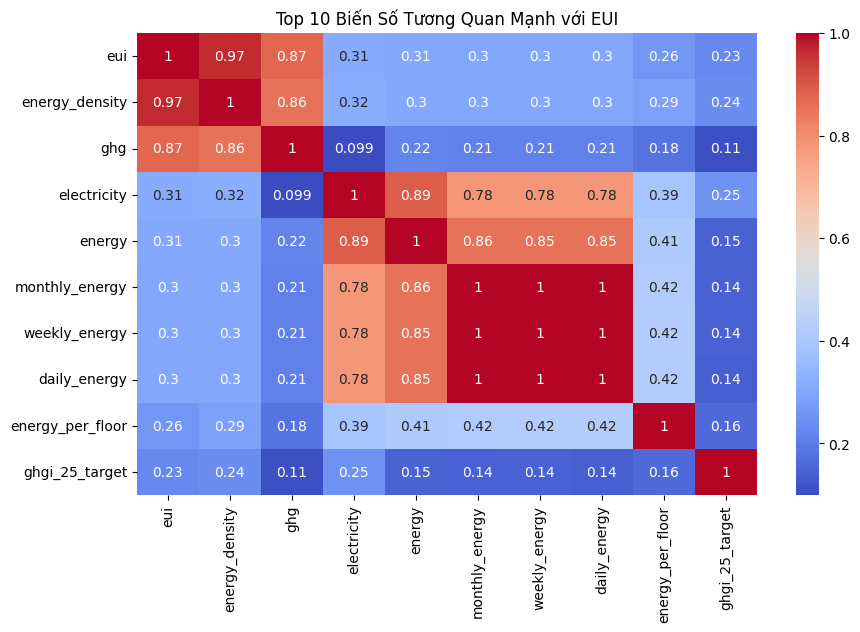

In [15]:
# Visualize numeric correlations
plt.figure(figsize=(10,6))
sns.heatmap(df[list(corr_with_eui.index[:10])].corr(), annot=True, cmap='coolwarm')
plt.title('Top 10 Biến Số Tương Quan Mạnh với EUI')
plt.show()

In [16]:
# Tính ANOVA cho từng biến phân loại
anova_results = []
for col in categorical_cols:
    groups = [group['eui'].values for name, group in df.groupby(col)]
    f_stat, p_value = f_oneway(*groups)
    anova_results.append({'feature': col, 'f_stat': f_stat, 'p_value': p_value})

In [17]:
# Chuyển kết quả thành DataFrame và sắp xếp
anova_df = pd.DataFrame(anova_results).sort_values(by='f_stat', ascending=False)

print(anova_df.head(10))

        feature     f_stat        p_value
8    size_group  94.928088   3.173961e-99
7     age_group  63.079916   1.533634e-65
2      bldgtype  55.663804   0.000000e+00
4  primary_type  54.971537   0.000000e+00
6       borough  44.453038   2.455837e-54
3    bldg_class  20.558068   0.000000e+00
1       zipcode   4.345097  1.100278e-103
0       address   0.659630   9.983521e-01
5      fuel_mix   0.509955   9.024888e-01


In [18]:
# Drop the unwanted categorical features
df = df.drop(['zipcode','address', 'fuel_mix'], axis=1)

In [19]:
df.to_csv('processed_data.csv', index=False)

In [20]:
# # 8. ENCODING CATEGORICAL VARIABLES
# print("\n--- Encoding Categorical Variables ---")
# # One-hot encode categorical variables (except the target)
# categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# if 'borough' in categorical_cols:
#     print(f"Converting {len(categorical_cols)} categorical columns to one-hot encoding")
#     df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

In [21]:
# df.to_csv('final_data.csv', index=False)

In [22]:
# # Check missing values
# missing_data = df.isnull().sum()
# missing_percentage = (missing_data / len(df)) * 100
# print("\nMissing values percentage:")
# print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

In [23]:
# df.head(2)

In [24]:
# df.dtypes